<a href="https://colab.research.google.com/github/saricongi/Exam_ML_Unipv_2023_SC/blob/master/phd_pwe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plane wave expansion for a 2D photonic crystal

Here is the [original version of legume](https://github.com/fancompute/legume) by Momchil Minkov et al, with the [full documentation](https://legume.readthedocs.io/en/latest/) and the [original examples](https://github.com/fancompute/legume/tree/master/docs/examples)

Taken from example 02 of `legume`, modified by Lucio Andreani and Simone Zanotti
for the PhD course "Photonics: theory and computational methods", Physics Department - University of Pavia, February 2024

# Install legume

Install the latest version of legume from Simone Zanotti's repository

In [1]:
!git clone https://github.com/Zano1995/legume.git

Cloning into 'legume'...
remote: Enumerating objects: 2414, done.
remote: Counting objects: 100% (336/336), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 2414 (delta 278), reused 270 (delta 233), pack-reused 2078
Receiving objects: 100% (2414/2414), 17.08 MiB | 25.17 MiB/s, done.
Resolving deltas: 100% (1679/1679), done.


Switch to the newest branch with symmetrization and polaritons

In [2]:
%cd legume
#!git checkout symm_and_polariton
!git checkout symm_update
%cd ..

/content/legume
Branch 'symm_update' set up to track remote branch 'symm_update' from 'origin'.
Switched to a new branch 'symm_update'
/content


In [3]:
import sys
sys.path.append("/content/legume")
import legume
print(f"Version of the imported legume : {legume.__version__}")

import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from legume import PlaneWaveExp, Circle, ShapesLayer, Lattice, viz

Version of the imported legume : 1.0.1


# Example 1: compare the photonic bands with Joannopoulos' book

Define 2D photonic crystal¶

In this example we will reproduce the modes for one of the structures discussed in Chapter 5 from "Photonic Crystals: Molding the Flow of Light" - the photonic crystal bible by John D. Joannopoulos, Steven Johnson, Joshua Winn and Robert Meade.



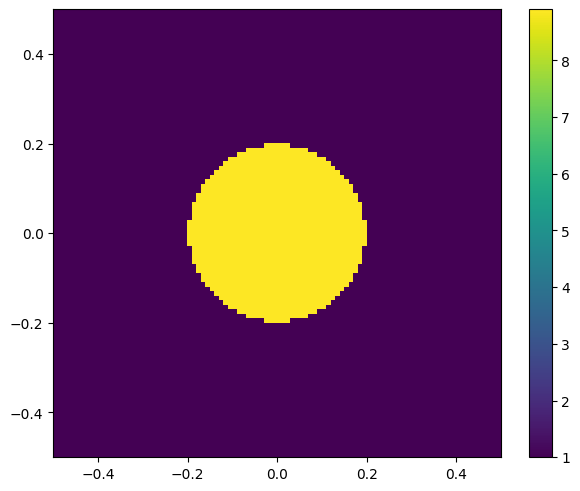

In [6]:
# Define parameters as for Chapter 5, Fig. 2 from Molding the Flow of Light:
# square lattice of dielectric columns, epsilon=8.9, r/a=0.2
ra = 0.2      # cylinder radius
eps_c = 8.9   # cylinder permittivity
eps_b = 1
#eps_c, eps_b = 1, 12

# Initialize lattice
lattice = Lattice('square')   # possible values are 'square', 'hexagonal', or custom with a pair of Bravais lattice vectors
# Initialize layer
layer = ShapesLayer(lattice, eps_b = eps_b)
# Add a cylinder to the layer
layer.add_shape(Circle(r=ra, eps=eps_c))
#layer.add_shape(Circle(r=ra, eps=eps_c, x_cent=0.2, y_cent=0.3))  # here if you want to give coordinates different from zero
# Visualize the structure
viz.eps(layer, cbar=True, cmap='viridis')

#avoid overlap between shapes, the code does not work!

In [ ]:
# Initialize the BZ bath as in Chapter 5, Fig. 2
path = lattice.bz_path(['G', 'X', 'M', 'G'], [20]) # this is a dictionary with the wavevectors in the BZ
#path = lattice.bz_path(['G', 'M', 'K', 'G'], [20]) # this is a dictionary with the wavevectors in the BZ

#print(path['kpoints'])

# Initialize the plane-wave expansion and visualize the FT of the structure
pwe = PlaneWaveExp(layer, gmax=6)
npw = np.shape(pwe.gvec)[1]  # number of plane waves in the expansion
print('npw = ', npw)

# viz.eps_ft(pwe, figsize = (4, 3), cmap='viridis')

Examine reciprocal lattice vectors and put them in order of increasing modulus

In [ ]:
# finds moduli of reciprocal lattice vectors in the expansion
gmod_list = []
for j in range(npw):
  #gx, gy = pwe.gvec[0, j], pwe.gvec[1,j]
  gx, gy = pwe.gvec[0, j]/2/np.pi, pwe.gvec[1,j]/2/np.pi
  gmod = np.sqrt(gx*gx+gy*gy)
  gmod_list.append(gmod)

gmod_list.sort()
for j in range(npw):
  print(j+1, gmod_list[j])



Compute the photonic bands

In [ ]:
# Run the plane-wave expansion for the two separate polarizations and store the bands
pwe.run(kpoints=path['kpoints'], pol='te')
freqs_te = pwe.freqs
nkappa, nfreq = freqs_te.shape[0], freqs_te.shape[1]
print('nkappa, nfreq = ', nkappa, nfreq)
pwe.run(kpoints=path['kpoints'], pol='tm')
freqs_tm = pwe.freqs

# Plot the results
fig, ax = plt.subplots(1, constrained_layout=True, figsize=(5, 4))
kappa = range(nkappa)
for j in range(nfreq):
  if (j == 0):
    plt.plot(kappa, freqs_te[:,j], 'r', label='TE')
    plt.plot(kappa, freqs_tm[:,j], 'b', label='TM')
  else:
    plt.plot(kappa, freqs_te[:,j], 'r')
    plt.plot(kappa, freqs_tm[:,j], 'b')
ax.set_ylim([0, 0.8])
ax.set_xlim([0, pwe.freqs.shape[0]-1])
ax.set_ylabel("$\omega a/2\pi c$")
plt.legend()

# The `path` dict provides some useful functionality for labeling of the BZ path
plt.xticks(path['indexes'], path['labels'])
ax.xaxis.grid('True')

#plt.savefig("bands.png")
#files.download("bands.png")
#plt.show()

Visualize the field of a mode

We can also plot the fields and compare to Fig. 3 of the book. Note that all fields are always continuous in wave-expansion methods, but the discontinuities are captured better and better with increasing the truncation of the Fourier basis (here by increasing gmax).

In [ ]:
# Compare to Chapter 5, Fig. 3, middle row
viz.field(pwe, field='d', kind=20, mind=0,
            component='z', val='im', N1=100, N2=100, cbar=True, eps=True);
viz.field(pwe, field='d', kind=20, mind=1,
          component='z', val='re', N1=100, N2=100, cbar=True, eps=True);

Exercise: compare with the structure of Ch. 5, Figure 5 (square lattice of dielectric veins with $\varepsilon=8.9$ and $t=0.165a$)

Suggestion: download the figure and import in powerpoint to compare

# Example 2: PWE convergence test, scaling of simulation time

In [ ]:
# Define parameters as for Chapter 5, Fig. 2 from Molding the Flow of Light
ra = 0.2      # cylinder radius
eps_c, eps_b = 8.9, 1 # cylinder and background permittivity

# Initialize lattice
lattice = Lattice('square')
# Initialize layer
layer = ShapesLayer(lattice, eps_b = eps_b)
# Add a cylinder to the layer
layer.add_shape(Circle(r=ra, eps=eps_c))

# Initialize the BZ bath as in Chapter 5, Fig. 2
path = lattice.bz_path(['G', 'X', 'M', 'G'], [10, 10, 14]) # this is a dictionary with the wavevectors in the BZ
#path = lattice.bz_path(['G', 'M', 'K', 'G'], [20]) # this is a dictionary with the wavevectors in the BZ
#print(path['kpoints'])
# The `path` dict provides some useful functionality for labeling of the BZ path

In [ ]:
# define the function to be run in a loop with gmax as a parameter
def run (gmax):
  pwe = PlaneWaveExp(layer, gmax=gmax)
  npw = np.shape(pwe.gvec)[1]  # number of plane waves in the expansion

  # Run the plane-wave expansion for the two separate polarizations and store the bands
  pwe.run(kpoints=path['kpoints'], pol='te')
  freqs_te = pwe.freqs
  pwe.run(kpoints=path['kpoints'], pol='tm')
  freqs_tm = pwe.freqs

  return npw, freqs_te, freqs_tm

In [ ]:
# driver: loop as a function of gmax to check convergence
# in the next cells we plot the bands and the computing time as a function of the number of plane waves

gmax_list = [5, 7, 10]
ngmax = np.shape(gmax_list)[0]
print('ngmax=',ngmax)
import time

npw_list, freqs_te_list, freqs_tm_list, time_list = [], [], [], []
for gmax in gmax_list:
  t0 = time.time()
  npw, freqs_te, freqs_tm = run(gmax)
  t1=time.time()
  print('gmax, npw, time = ', gmax, npw, t1-t0)
  time_list.append(t1-t0)
  npw_list.append(npw)
  freqs_te_list.append(freqs_te)
  freqs_tm_list.append(freqs_tm)

print(npw_list, time_list)

In [ ]:
# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=ngmax, constrained_layout=True, figsize=(4*ngmax, 3))
for j in range(ngmax):
  ax[j].plot(freqs_te_list[j], 'r')
  ax[j].plot(freqs_tm_list[j], 'b')
  ax[j].set_ylim([0, 0.8])
  ax[j].set_xlim([0, freqs_te.shape[0]-1])
  ax[j].set_ylabel("$\omega a/2\pi c$")
  ax[j].xaxis.grid('True')
  ax[j].set_xticks(path['indexes'], path['labels'])

In [ ]:
# this is the scaling with the number of plane waves

plt.figure(figsize=(5,4))
plt.plot(npw_list, time_list, 'o-')
x=np.arange(1000)
y2 = 1e-4*x**2
y3 = 1e-6*x**3
y4 = 1e-8*x**4
plt.plot(x, y2, label = '$x^2$', color='red')
plt.plot(x, y3, label = '$x^3$', color='blue')
plt.plot(x, y4, label = '$x^4$', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlim(100, 1000)
plt.ylim(0.5, 500)
plt.legend()

Exercise: test convergence with lower/higher number of plane waves

Test convergence separately for TE or TM modes

# Example 3: search for complete photonic bandgap

In [ ]:
# define the function to be run, with all data as function parameters
def run_pwe (lattice, ra, eps_c, eps_b, gmax, path):
  # Initialize layer
  layer = ShapesLayer(lattice, eps_b = eps_b)
  # Add a cylinder to the layer
  layer.add_shape(Circle(r=ra, eps=eps_c))
  pwe = PlaneWaveExp(layer, gmax=gmax)
  npw = np.shape(pwe.gvec)[1]  # number of plane waves in the expansion

  # Run the plane-wave expansion for the two separate polarizations and store the bands
  pwe.run(kpoints=path['kpoints'], pol='te')
  freqs_te = pwe.freqs
  pwe.run(kpoints=path['kpoints'], pol='tm')
  freqs_tm = pwe.freqs

  return npw, freqs_te, freqs_tm

In [ ]:
# driver: defines the parameters and runs pwe
bravais_lattice = 'hexagonal'
lattice = Lattice(bravais_lattice)
ra = 0.45      # cylinder radius
eps_c, eps_b = 1, 12 # cylinder and background permittivity
#path = ['G', 'X', 'M', 'G']
kpath = ['G', 'M', 'K', 'G']
nk = 20
nkpath = [nk]
path = lattice.bz_path(kpath, nkpath) # this is a dictionary with the wavevectors in the BZ
gmax = 7

npw, freqs_te, freqs_tm = run_pwe (lattice, ra, eps_c, eps_b, gmax, path)

In [ ]:
# Plot the results

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8, 4))
kappa = range(nkappa)
for j in range(nfreq):
  if (j == 0):
    ax[0].plot(kappa, freqs_te[:,j], 'r', label='TE')
    ax[1].plot(kappa, freqs_tm[:,j], 'b', label='TM')
  else:
    ax[0].plot(kappa, freqs_te[:,j], 'r')
    ax[1].plot(kappa, freqs_tm[:,j], 'b')
ax[0].set_ylim([0., 0.7])
ax[0].set_xlim([0, pwe.freqs.shape[0]-1])
ax[0].set_ylabel("$\omega a/2\pi c$")
ax[1].set_ylim([0., 0.7])
ax[1].set_xlim([0, pwe.freqs.shape[0]-1])
ax[1].set_ylabel("$\omega a/2\pi c$")
ax[0].legend(loc='lower center')
ax[1].legend(loc='lower center')

# The `path` dict provides some useful functionality for labeling of the BZ path
ax[0].set_xticks(path['indexes'], path['labels'])
ax[0].xaxis.grid('True')
ax[1].set_xticks(path['indexes'], path['labels'])
ax[1].xaxis.grid('True')


In [ ]:
# calculate band gaps
# the proper expressions should be specified case by case
w1_te, w2_te = freqs_te[2*nk,0], freqs_te[nk,1]
gap_te = w2_te-w1_te

w1_tm, w2_tm = freqs_tm[0, 1], freqs_tm[2*nk,2]
gap_tm = w2_tm-w1_tm

print('w1_te, w2_te, gap_te = ', w1_te, w2_te, gap_te)
print('w1_tm, w2_tm, gap_tm = ', w1_tm, w2_tm, gap_tm)

In [ ]:
Exercise:

1) Look for opening of a photonic band gap in the triangular lattice as a function of r/a

2) Automatize the procedure, by making a loop as a function of r/a and storing gap edges in a list